# iNeuron
## DLCVNLP (Deep Learning - Computer Vision - Natural Language Processing)
## Matplotlib Assignment

### Scipy
We have the min and max temperatures in a city In India for each month of the year.

We would like to find a function to describe this and show it graphically, the dataset
given below.
### Task
1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Monthly_Graph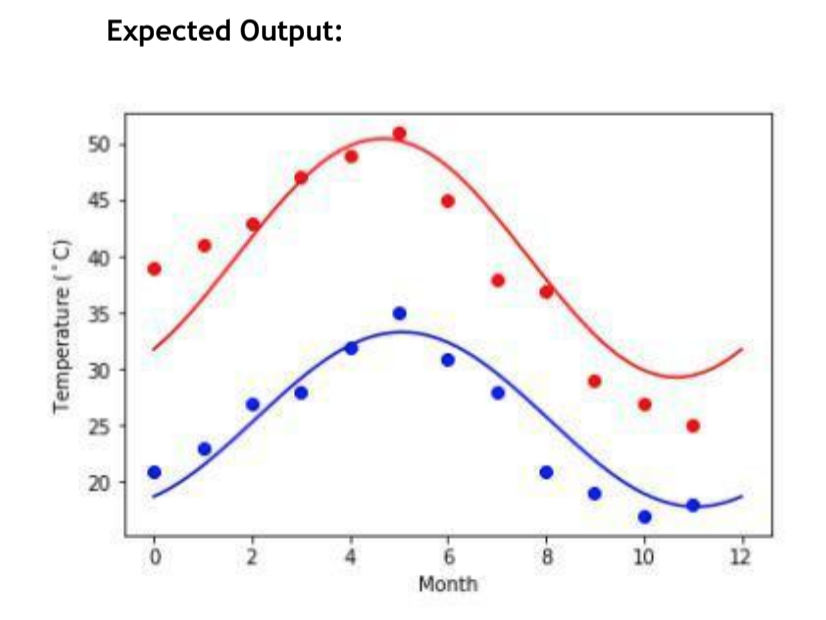

Text(0, 0.5, 'Min and max temperature')

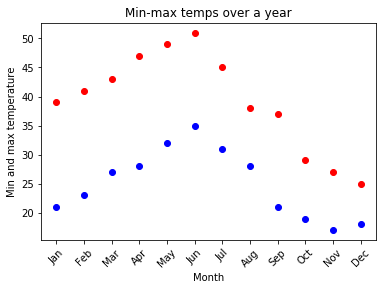

In [67]:
# http://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_curvefit_temperature_data.html

import matplotlib.pyplot as plt
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(months, max_temps, 'ro')
plt.plot(months, min_temps, 'bo')
plt.title('Min-max temps over a year')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Min and max temperature')

In [61]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_temps, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_temps, [-40, 20, 0])

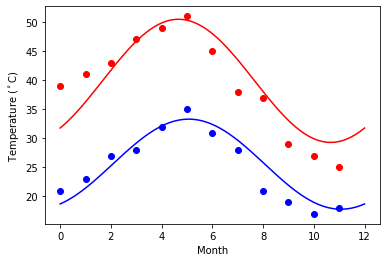

In [63]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temps, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temps, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### Matplotlib
This assignment is for visualization using matplotlib:

data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [72]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [90]:
titanic.isnull().sum()

pclass         1
survived       1
name           1
sex            1
age          264
sibsp          1
parch          1
ticket         1
fare           2
embarked       3
home.dest    565
dtype: int64

In [87]:
titanic.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"


In [127]:
titanic['fare'].mean(), titanic['fare'].median(), titanic['fare'].std()

(33.29547928134572, 14.4542, 51.758668239174135)

In [163]:
titanic['fare'].fillna(method='ffill', inplace=True)

In [166]:
titanic['embarked'].fillna(method='ffill', inplace=True)

In [187]:
titanic['age'] = titanic['age'].round(1)

In [ ]:
titanic['fare'] = titanic['fare'].round(2)

In [131]:
prev_age = titanic['age']

In [178]:
titanic['age'].interpolate(method='nearest', inplace=True)

In [92]:
prev_dest = titanic['home.dest']

In [229]:
titanic['home.dest'] = titanic['home.dest'].fillna("unknown")

In [120]:
titanic = titanic.drop(titanic.index[1309])

In [83]:
titanic = titanic.drop(['cabin','body'], axis=1)

In [89]:
titanic = titanic.drop('boat', axis=1)

In [248]:
titanic.dtypes

pclass        float64
survived      float64
name           object
sex          category
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
embarked       object
home.dest      object
dtype: object

In [251]:
titanic['home.dest'].nunique(), titanic['embarked'].nunique()

(370, 3)

In [245]:
titanic['sex'] = titanic['sex'].astype('category')

In [246]:
titanic['sex'].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

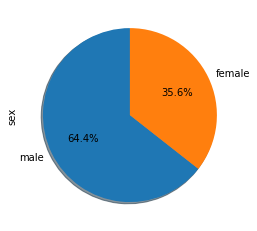

In [256]:
titanic['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

Text(0.5, 1.0, 'Age vs Fare Colored by Sex')

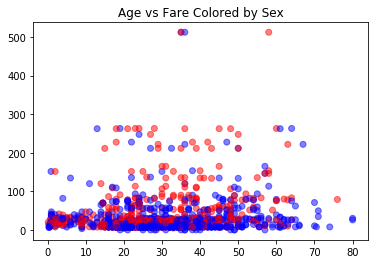

In [278]:
mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))
plt.title('Age vs Fare Colored by Sex')

(array([720.,  88.,  70.,  60.,  60.,  67.,  48.,  72.,  62.,  62.]),
 array([  0. ,  36.9,  73.8, 110.7, 147.6, 184.5, 221.4, 258.3, 295.2,
        332.1, 369. ]),
 <a list of 10 Patch objects>)

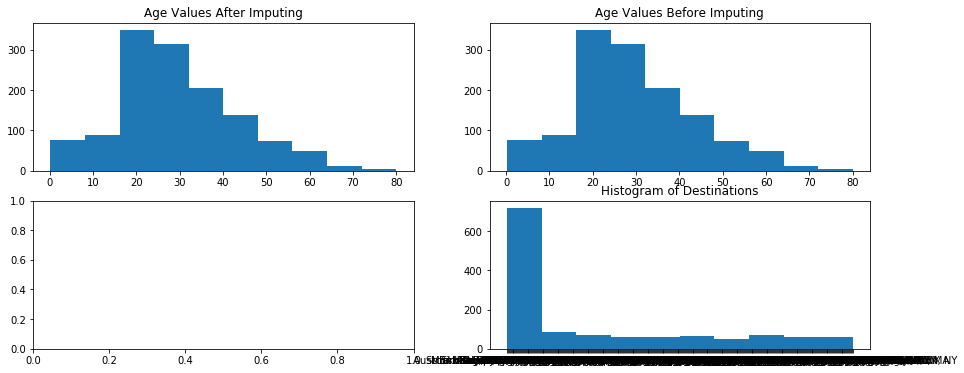

In [260]:
fig, axes = plt.subplots(2,2, figsize=(15,6))
plt.subplot(2,2,1)
plt.title('Age Values After Imputing')
plt.hist(titanic['age'])
plt.subplot(2,2,2)
plt.title('Age Values Before Imputing')
plt.hist(prev_age)
plt.subplot(2,2,4)
plt.title('Histogram of Destinations')
plt.hist(titanic['home.dest'])

In [230]:
titanic[1220:1230]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
1220,3.0,0.0,"Spinner, Mr. Henry John",male,32.0,0.0,0.0,STON/OQ. 369943,8.0500,S,unknown
1221,3.0,0.0,"Staneff, Mr. Ivan",male,32.0,0.0,0.0,349208,7.8958,S,unknown
1222,3.0,0.0,"Stankovic, Mr. Ivan",male,33.0,0.0,0.0,349239,8.6625,C,unknown
1223,3.0,1.0,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0.0,0.0,CA. 2314,7.5500,S,unknown
1224,3.0,0.0,"Stanley, Mr. Edward Roland",male,21.0,0.0,0.0,A/4 45380,8.0500,S,unknown
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,8.0500,S,unknown
1226,3.0,0.0,"Stoytcheff, Mr. Ilia",male,19.0,0.0,0.0,349205,7.8958,S,unknown
1227,3.0,0.0,"Strandberg, Miss. Ida Sofia",female,22.0,0.0,0.0,7553,9.8375,S,unknown
1228,3.0,1.0,"Stranden, Mr. Juho",male,31.0,0.0,0.0,STON/O 2. 3101288,7.9250,S,unknown
1229,3.0,0.0,"Strilic, Mr. Ivan",male,27.0,0.0,0.0,315083,8.6625,S,unknown
